# 라이브러리 불러오기

In [1]:
from glob import glob 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import folium

# 데이터 불러오기

In [2]:
glob('data/*.csv')

['data/test.csv', 'data/train.csv', 'data/sample_submission.csv']

In [3]:
train = pd.read_csv(glob('data/*.csv')[1])
test = pd.read_csv(glob('data/*.csv')[0])
submission = pd.read_csv(glob('data/*.csv')[2])

# 데이터 살펴보기

칼럼 설명
- ID : 샘플 별 고유 id
- Exercise_Duration  : 운동 시간(분)
- Body_Temperature(F) : 체온
- BPM : 심박수
- Height(Feet) : 키(피트)
- Height(Remainder_Inches) : 키(피트 계산 후 더해야 할 키)
- Weight(lb) : 몸무게(파운드)
- Weight_Status : 체중 상태
- Gender : 성별
- Age : 나이
- Calories_Burned : 칼로리 소모량(목표 예측값)

In [4]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


## 결측치 확인

In [5]:
# 결측치 없음 
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [6]:
# 결측치 없음 
test.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

## 이상치 확인

In [7]:
train.describe()

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Age,Calories_Burned
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,104.033573,95.498133,5.248800,5.717600,165.361187,42.636000,89.373467
std,8.3553,1.412845,9.587331,0.556663,3.497315,33.308136,16.883188,62.817086
min,1.0000,98.800000,69.000000,4.000000,0.000000,79.400000,20.000000,1.000000
25%,8.0000,103.300000,88.000000,5.000000,3.000000,138.900000,28.000000,35.000000
50%,15.0000,104.400000,95.000000,5.000000,6.000000,163.100000,39.000000,77.000000
75%,23.0000,105.100000,103.000000,6.000000,9.000000,191.800000,56.000000,138.000000
max,30.0000,106.700000,128.000000,7.000000,12.000000,291.000000,79.000000,300.000000


In [8]:
train.describe(include='O')

,ID,Weight_Status,Gender
count,7500,7500,7500
unique,7500,3,2
top,TRAIN_0000,Normal Weight,F
freq,1,4681,3769


array([[<Axes: title={'center': 'Exercise_Duration'}>,
        <Axes: title={'center': 'Body_Temperature(F)'}>,
        <Axes: title={'center': 'BPM'}>],
       [<Axes: title={'center': 'Height(Feet)'}>,
        <Axes: title={'center': 'Height(Remainder_Inches)'}>,
        <Axes: title={'center': 'Weight(lb)'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Calories_Burned'}>, <Axes: >]],
      dtype=object)

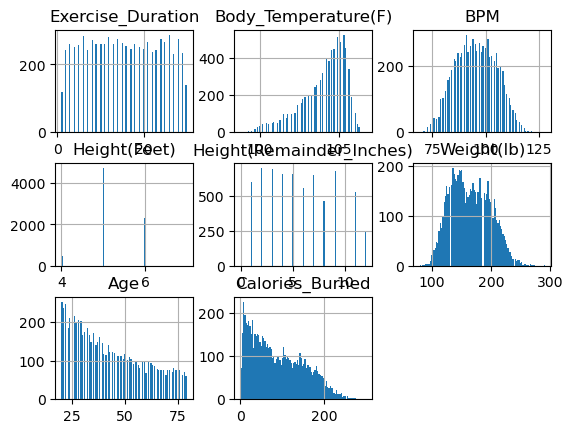

In [9]:
train.hist(bins=100)

<Axes: >

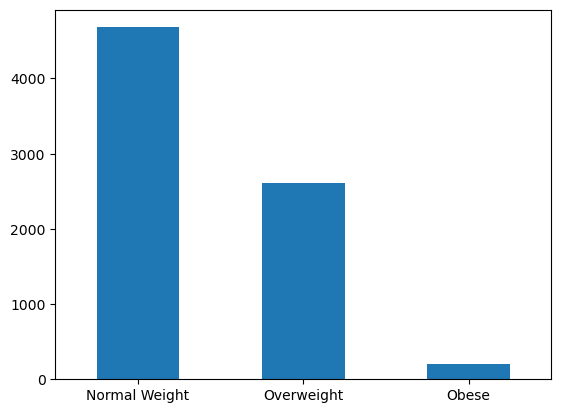

In [10]:
# Obese가 현저히 적음, Pd.get_dummies로 인코딩을 해주자 
train['Weight_Status'].value_counts().plot.bar(rot=0)

# 피처 엔지니어링

In [11]:
train.head(2)

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0


In [12]:
# ft, inch column을 하나의 cm 컬럼으로 변경해줌 
train['Height(cm)'] = train['Height(Feet)'] * 30.48 + train['Height(Remainder_Inches)']*2.54
test['Height(cm)'] = test['Height(Feet)'] * 30.48 + test['Height(Remainder_Inches)']*2.54

In [13]:
# 기존 ft, inch column은 삭제 
train = train.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])
test = test.drop(columns=['Height(Feet)','Height(Remainder_Inches)'])

In [14]:
test = test.set_index('ID')
train = train.set_index('ID')

In [15]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [16]:
train.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Age,Calories_Burned,Height(cm),Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M
ID,,,,,,,,,,,,
TRAIN_0000,26.0,105.6,107.0,154.3,45,166.0,175.26,1,0,0,1,0
TRAIN_0001,7.0,103.3,88.0,224.9,50,33.0,198.12,0,0,1,0,1


In [17]:
test.head(2)

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Age,Height(cm),Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M
ID,,,,,,,,,,,
TEST_0000,26.0,105.1,107.0,114.6,45,154.94,1,0,0,1,0
TEST_0001,29.0,104.9,111.0,198.4,21,187.96,0,0,1,0,1


## 머신러닝 (Auto-Gluon) 

In [18]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 4.6 MB/s eta 0:00:00
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 MB 1.8 MB/s eta 0:00:0000:0100:02
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 482.6/482.6 kB 4.5 MB/s eta 0:00:00a 0:00:01


  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.3.2-cp39-cp39-macosx_13_0_x86_64.whl size=52188 sha256=e6abeb5db25261b2ccd361dbf775e97a9629269ffc9c58214225023ce4dfc824
  Stored in directory: /Users/stevencheong/Library/Caches/pip/wheels/9e/36/06/4c11e300918011376af149098621ec7ebe06d8256566d43d51
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184097 sha256=affe67342fb6e1ba70902539831eb7ae67024ae2b058ee49d3fb2db5ae198bc9
  Stored in directory: /Users/stevencheong/Library/Caches/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built plotly-resampler pyod
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
  Attemptin

In [20]:
from pycaret.regression import setup, compare_models, predict_model

pycaret_automl = setup(data=train, target = 'Calories_Burned')

,Description,Value
0,Session id,343
1,Target,Calories_Burned
2,Target type,Regression
3,Original data shape,"(7500, 12)"
4,Transformed data shape,"(7500, 12)"
5,Transformed train set shape,"(5250, 12)"
6,Transformed test set shape,"(2250, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [22]:
pycaret_models = compare_models(sort='RMSE', budget_time=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.6914,1.2239,1.0922,0.9997,0.0369,0.0181,0.0270
lightgbm,Light Gradient Boosting Machine,1.5963,6.5590,2.5383,0.9983,0.0496,0.0297,0.0300
xgboost,Extreme Gradient Boosting,1.9005,8.1891,2.8579,0.9979,0.0528,0.0332,0.0230
et,Extra Trees Regressor,1.9761,10.3582,3.2031,0.9974,0.0482,0.0318,0.0960
gbr,Gradient Boosting Regressor,2.7044,14.6765,3.8242,0.9963,0.1174,0.0657,0.0260
rf,Random Forest Regressor,2.3858,15.0972,3.8650,0.9961,0.0547,0.0370,0.0700
dt,Decision Tree Regressor,4.4330,46.6352,6.8133,0.9881,0.0885,0.0626,0.0230
knn,K Neighbors Regressor,7.1293,98.5619,9.9123,0.9748,0.2277,0.1788,0.0210
br,Bayesian Ridge,8.3896,128.9736,11.3406,0.9671,0.3877,0.2878,0.0190
lar,Least Angle Regression,8.3899,128.9763,11.3408,0.9671,0.3881,0.2876,0.0210


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [24]:
print(pycaret_models)

In [25]:
from sklearn.metrics import mean_squared_error

predictions = predict_model(pycaret_models, data=test)


In [26]:
predictions

,Exercise_Duration,Body_Temperature(F),BPM,Weight(lb),Age,Height(cm),Weight_Status_Normal Weight,Weight_Status_Obese,Weight_Status_Overweight,Gender_F,Gender_M,prediction_label
ID,,,,,,,,,,,,
TEST_0000,26.0,105.099998,107.0,114.599998,45,154.940002,1,0,0,1,0,173.448538
TEST_0001,29.0,104.900002,111.0,198.399994,21,187.960007,0,0,1,0,1,191.301125
TEST_0002,11.0,104.000000,90.0,169.800003,58,175.259995,1,0,0,0,1,53.288058
TEST_0003,24.0,105.400002,108.0,196.199997,35,182.880005,0,0,1,0,1,162.056897
TEST_0004,29.0,106.000000,116.0,147.699997,67,170.179993,1,0,0,1,0,225.758051
...,...,...,...,...,...,...,...,...,...,...,...,...
TEST_7495,28.0,105.599998,106.0,178.600006,51,182.880005,1,0,0,0,1,195.982745
TEST_7496,4.0,102.000000,84.0,183.000000,25,177.800003,0,0,1,0,1,10.219991
TEST_7497,24.0,105.099998,97.0,130.100006,42,157.479996,1,0,0,1,0,130.191213


In [27]:
submission['Calories_Burned'] = predictions['prediction_label']
submission = submission.set_index('ID')

In [28]:
submission.to_csv('the_calorie_pycaret_catboost.csv')

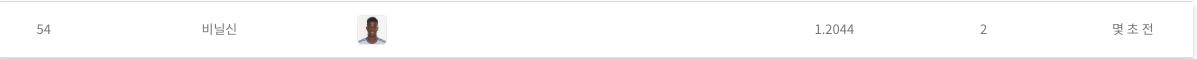